In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import scipy.spatial
import sklearn.metrics

In [74]:
df = pd.read_csv('../../../iterations_points_MB72DZKkCg_27630.0_27810.0_15.0.csv', sep="\s*,\s*")
#df = df.set_index("route")
#df = df.drop(columns=["route"])
#df = df.transpose()
#df = df.loc[:, (df.mean(axis=0) > 0.005)]
#df = df.reset_index()
#df = df.rename(columns={'index':"beta"})
#df.at[0,'beta'] = -1
#df = df.drop(index=[2,3])
df.head()
#df["meanTT"] = pd.to_numeric(df["meanTT"], downcast="float")


e:\phd\hub-simulator\src\main\python\venv\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,it,operator,accepted,amw1-27630.0-27645.0,amw1-27645.0-27660.0,amw1-27660.0-27675.0,amw1-27675.0-27690.0,amw1-27690.0-27705.0,amw1-27705.0-27720.0,amw1-27720.0-27735.0,...,meanTT,DecreaseSpeed_weight,DirectionMatchFlowCombinedSpeedUpdates_weight,DownstreamDensityUpdate_weight,IncreaseSpeed_weight,RandomSetSpeed_weight,AccelerateAllSpeeds_weight,DeccelerateAllSpeeds_weight,RandomSetSpeedCombinedSpeedUpdates_weight,ExploreBestSolution_weight
0,1,RandomSetSpeedCombinedSpeedUpdates,accepted,0.0,1.0,1.0,-1.0,-1.0,-3.0,0.0,...,59.015098,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.50,5.0
1,2,RandomSetSpeed,accepted,0.0,1.0,1.0,-1.0,-1.0,-3.0,0.0,...,58.625337,5.0,5.0,5.0,5.0,5.5,5.0,5.0,5.50,5.0
2,3,DecreaseSpeed,rejected,0.0,1.0,1.0,-1.0,-1.0,-3.0,0.0,...,61.890285,4.6,5.0,5.0,5.0,5.5,5.0,5.0,5.50,5.0
3,4,RandomSetSpeedCombinedSpeedUpdates,accepted,1.0,1.0,2.0,2.0,2.0,3.0,3.0,...,58.266705,4.6,5.0,5.0,5.0,5.5,5.0,5.0,5.95,5.0
4,5,AccelerateAllSpeeds,accepted,1.0,1.0,1.0,-1.0,-1.0,-3.0,0.0,...,59.176608,4.6,5.0,5.0,5.0,5.5,5.5,5.0,5.95,5.0


In [101]:
#df_ref = pd.read_csv('../../../piw-route-choice-shortest-path_routes_usage.csv')
#df_ref = df_ref.set_index('route')
##df_ref = df_ref.drop(columns=["route"])
#df_ref = df_ref.transpose()
##df_ref = df_ref.loc[:, (df_ref.max(axis=0) > 0.005)]
#df_ref = df_ref.reset_index()
#df_ref = df_ref.rename(columns={'index':"beta"})
#df_ref = df_ref.drop(index=[1])
#df_ref.head()

In [ ]:
#df_new = df_ref.append(df, ignore_index=True)
#df_new = df_new.reset_index()
#df_new = df_new.rename(columns={'index':"route"})
#df_new = df_new.set_index('route')
#df_new["beta"] = pd.to_numeric(df_new["beta"], downcast="float")
#df_new = df_new.loc[:, (df_new.max(axis=0) > 0.005)]
#df_new.head()

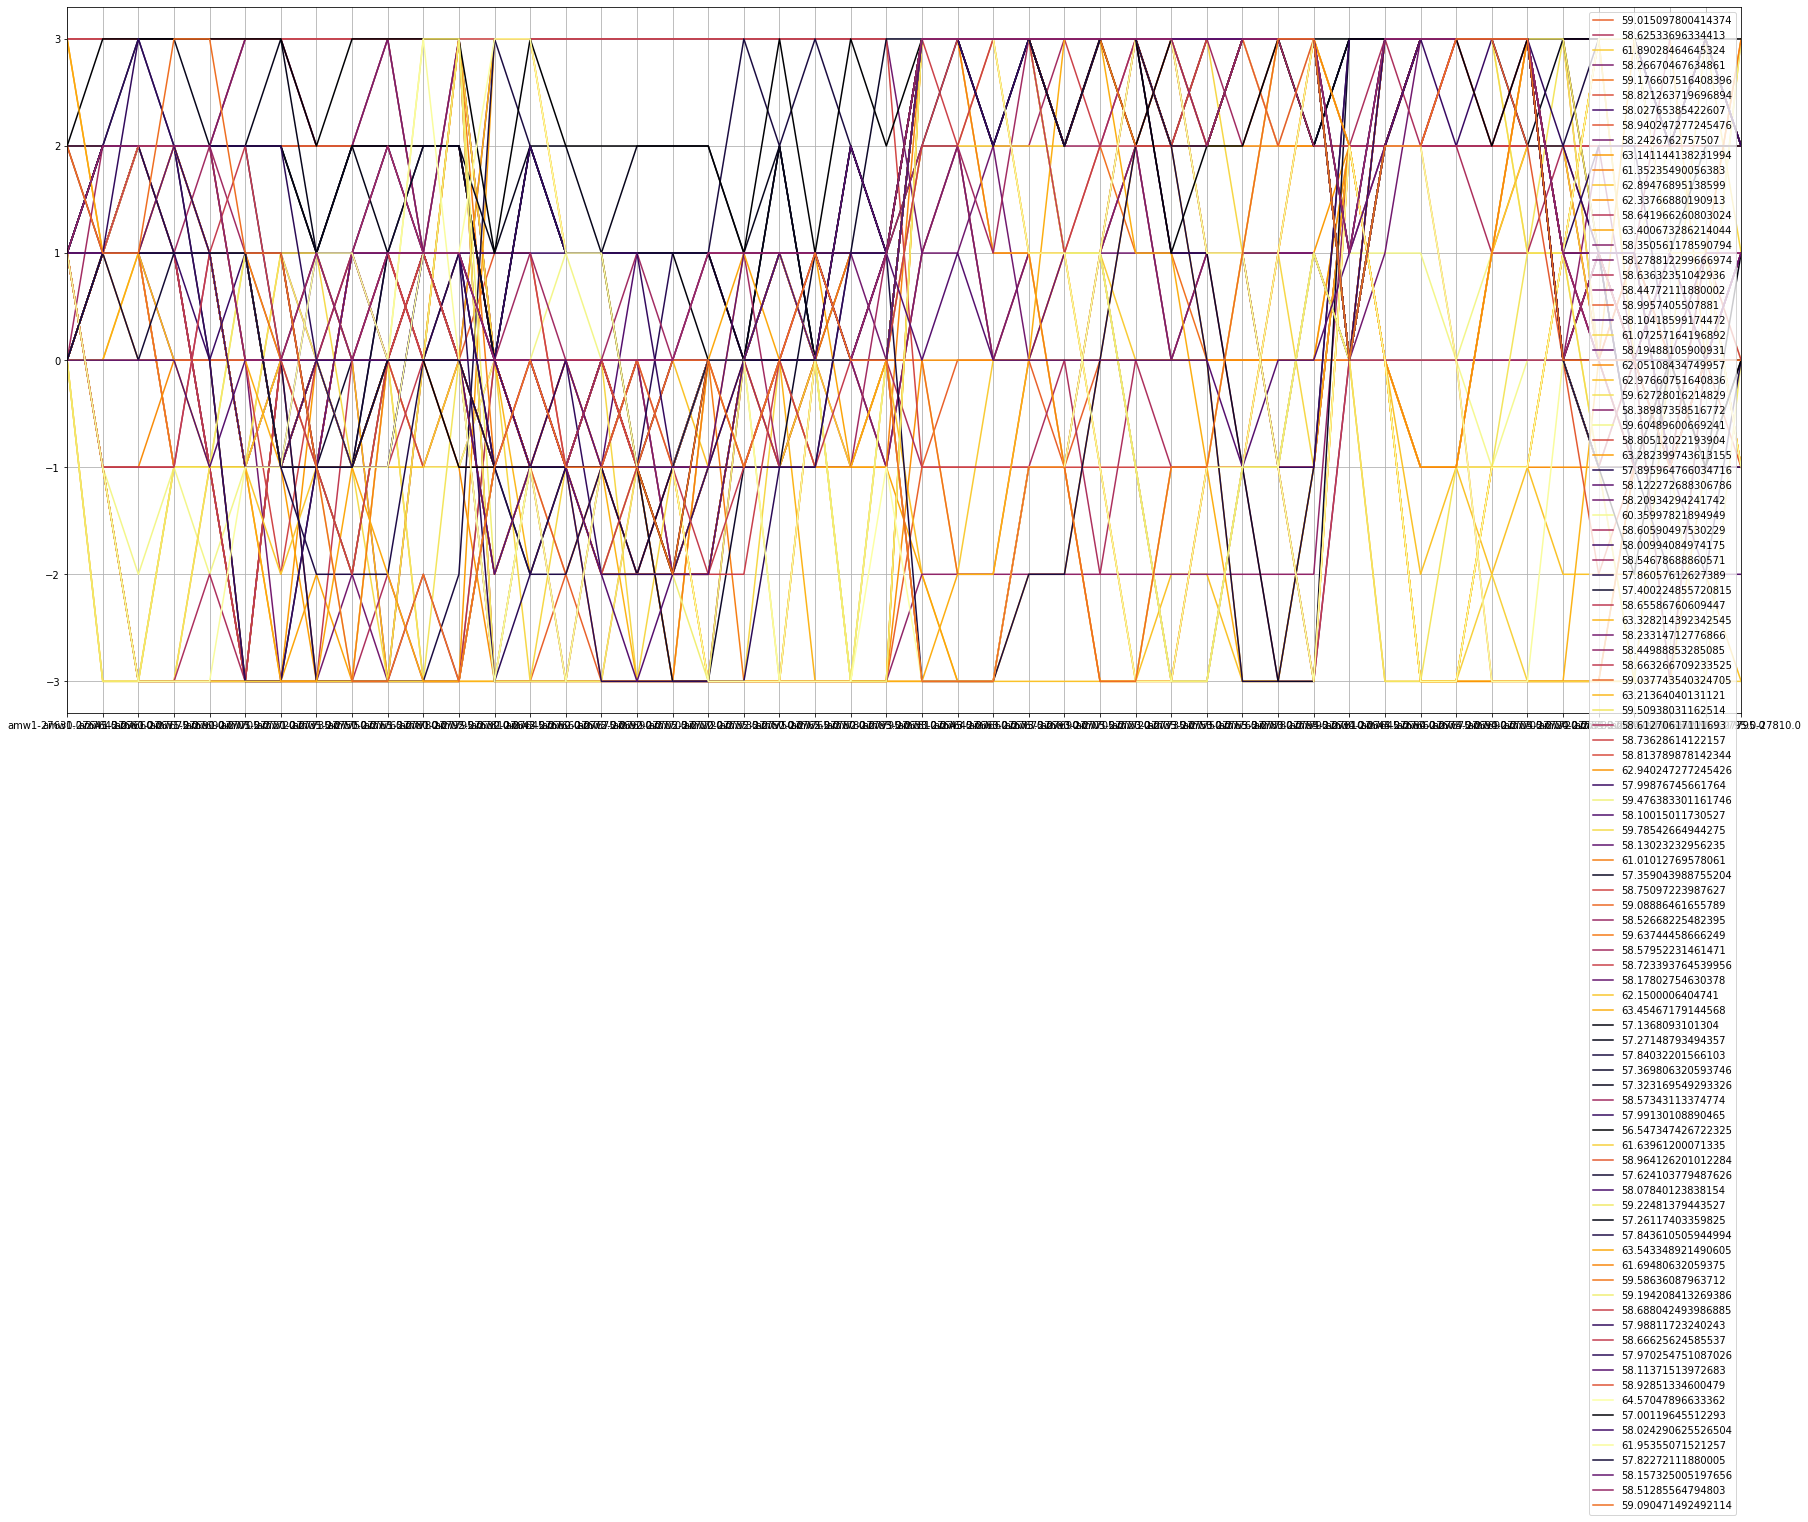

In [75]:
#df_plot = df
#df_plot = df_plot[df_plot.columns.drop(list(df_plot.filter(regex='amw')))]
#df_plot = df_plot[df_plot.columns.drop(list(df_plot.filter(regex='weight')))]
#df_plot = df_plot.drop(columns=['it','operator','accepted'])
df_plot = pd.concat([df.loc[:,(df.columns.str.contains('meanTT'))], df.loc[:,(df.columns.str.contains('amw'))]], axis=1, sort=False)
fig, ax = plt.subplots(figsize=(30,13))
parallel_coordinates(df_plot, 'meanTT', axvlines= False, colormap="inferno", sort_labels=True)
#ax.set_ylim(0,0.03)
#ax.set_xlim(30,100)
plt.show()




In [ ]:
test = sklearn.metrics.pairwise.nan_euclidean_distances([[1,    1]], [[1,1]])
print(test)

In [ ]:
#df = df.drop(columns=["beta"])
for index, row in df.iterrows():
    #print(index)
    #print(df.iloc[index, 1:])
    a = df.iloc[0, 1:].transpose()
    b = df.iloc[index, 1:].transpose()
    res = sklearn.metrics.pairwise.nan_euclidean_distances(a.to_numpy().reshape(1,-1), b.to_numpy().reshape(1,-1))
    print(df.iloc[index,0], res)

In [102]:
#df = df.drop(columns=["beta"])
for index, row in df.iterrows():
    #print(index)
    #print(df.iloc[index, 1:])
    a = df.iloc[0, 1:].transpose()
    b = df.iloc[index, 1:].transpose()
    res = sklearn.metrics.pairwise.nan_euclidean_distances(a.to_numpy().reshape(1,-1), b.to_numpy().reshape(1,-1))
    print(df.iloc[index,0], res)

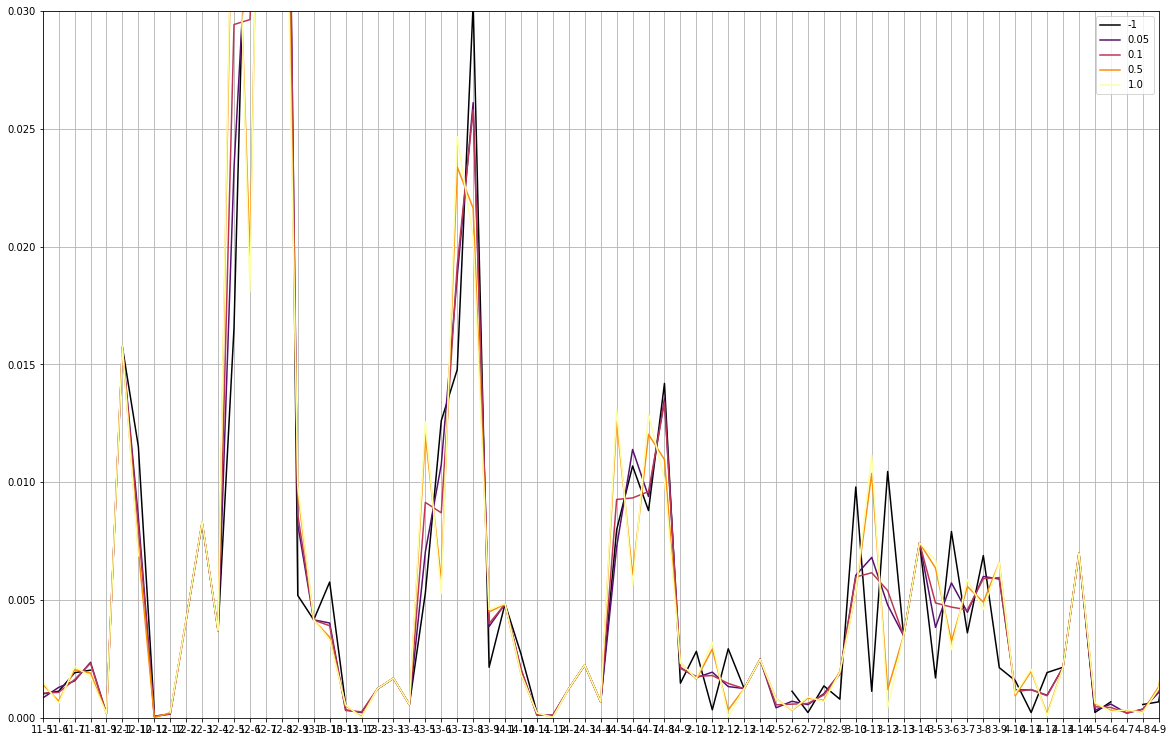

In [103]:
fig, ax = plt.subplots(figsize=(20,13))
parallel_coordinates(df, 'beta', axvlines= False, colormap="inferno")
ax.set_ylim(0,0.03)
ax.set_xlim(30,100)
plt.show()

In [104]:
test = sklearn.metrics.pairwise.nan_euclidean_distances([[1,    1]], [[1,1]])
print(test)

[[0.]]


In [111]:
#df = df.drop(columns=["beta"])
for index, row in df.iterrows():
    #print(index)
    #print(df.iloc[index, 1:])
    a = df.iloc[0, 1:].transpose()
    b = df.iloc[index, 1:].transpose()
    res = sklearn.metrics.pairwise.nan_euclidean_distances(a.to_numpy().reshape(1,-1), b.to_numpy().reshape(1,-1))
    print(df.iloc[index,0], res)

-1 [[3.80901514e-09]]
0.05 [[0.03682692]]
0.1 [[0.04085663]]
0.5 [[0.07221129]]
1.0 [[0.07983633]]
